<h1><center>Netflix Data Report</center>

## Data Cleaning and Preperation

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.graph_objects as go
import plotly.express as px
import plotly as pol
import plotly.offline as pyo
import plotly.graph_objs as go


In [2]:
netflix = pd.read_csv("netflix_titles.csv")
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [3]:
updated = netflix.drop(['description','cast'], axis = 1)
updated

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,TV Show,3%,NaN,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,s2,Movie,7:19,Jorge Michel Grau,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies"
2,s3,Movie,23:59,Gilbert Chan,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies"
3,s4,Movie,9,Shane Acker,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi..."
4,s5,Movie,21,Robert Luketic,United States,"January 1, 2020",2008,PG-13,123 min,Dramas
...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies"
7783,s7784,Movie,Zubaan,Mozez Singh,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals"
7784,s7785,Movie,Zulu Man in Japan,NaN,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV"


In [4]:
updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 10 columns):
show_id         7787 non-null object
type            7787 non-null object
title           7787 non-null object
director        5398 non-null object
country         7280 non-null object
date_added      7777 non-null object
release_year    7787 non-null int64
rating          7780 non-null object
duration        7787 non-null object
listed_in       7787 non-null object
dtypes: int64(1), object(9)
memory usage: 608.5+ KB


In [5]:
updated.count()

show_id         7787
type            7787
title           7787
director        5398
country         7280
date_added      7777
release_year    7787
rating          7780
duration        7787
listed_in       7787
dtype: int64

In [6]:
missing_percentages = updated.isna().sum().sort_values(ascending=False) / len(updated)
missing_percentages 


director        0.306793
country         0.065109
date_added      0.001284
rating          0.000899
listed_in       0.000000
duration        0.000000
release_year    0.000000
title           0.000000
type            0.000000
show_id         0.000000
dtype: float64

In [7]:
missing_percentages[missing_percentages != 0]

director      0.306793
country       0.065109
date_added    0.001284
rating        0.000899
dtype: float64

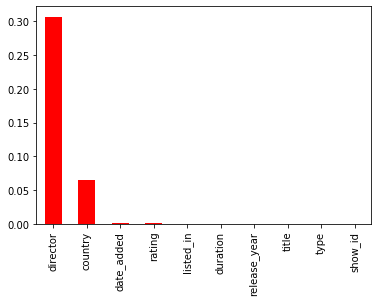

In [8]:
missing_percentages.plot(kind='bar',color = 'red')

In [9]:
df = updated.dropna()
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
1,s2,Movie,7:19,Jorge Michel Grau,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies"
2,s3,Movie,23:59,Gilbert Chan,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies"
3,s4,Movie,9,Shane Acker,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi..."
4,s5,Movie,21,Robert Luketic,United States,"January 1, 2020",2008,PG-13,123 min,Dramas
5,s6,TV Show,46,Serdar Akar,Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries"
...,...,...,...,...,...,...,...,...,...,...
7780,s7781,Movie,Zoo,Shlok Sharma,India,"July 1, 2018",2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies"
7781,s7782,Movie,Zoom,Peter Hewitt,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies"
7782,s7783,Movie,Zozo,Josef Fares,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies"
7783,s7784,Movie,Zubaan,Mozez Singh,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals"


In [10]:
netflix_shows=[df['type']=='TV Show']

In [11]:
netflix_movies=df[df['type']=='Movie']

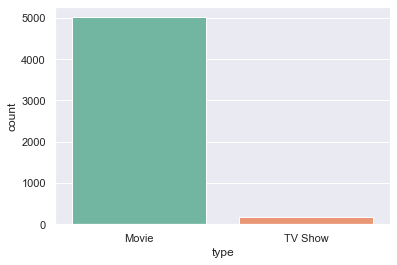

In [12]:
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=df, palette="Set2")

In [13]:
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
1,s2,Movie,7:19,Jorge Michel Grau,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies"
2,s3,Movie,23:59,Gilbert Chan,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies"
3,s4,Movie,9,Shane Acker,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi..."
4,s5,Movie,21,Robert Luketic,United States,"January 1, 2020",2008,PG-13,123 min,Dramas
5,s6,TV Show,46,Serdar Akar,Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries"
...,...,...,...,...,...,...,...,...,...,...
7780,s7781,Movie,Zoo,Shlok Sharma,India,"July 1, 2018",2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies"
7781,s7782,Movie,Zoom,Peter Hewitt,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies"
7782,s7783,Movie,Zozo,Josef Fares,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies"
7783,s7784,Movie,Zubaan,Mozez Singh,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals"


In [14]:
pd.set_option('mode.chained_assignment','warn')

pd.options.mode.chained_assignment = None  # default='warn'

In [15]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df.loc[:,'date_added'].dt.year
df['month_added'] = df.loc[:,'date_added'].dt.month

df['season_count'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,season_count
1,s2,Movie,7:19,Jorge Michel Grau,Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",2016,12,
2,s3,Movie,23:59,Gilbert Chan,Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies",2018,12,
3,s4,Movie,9,Shane Acker,United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",2017,11,
4,s5,Movie,21,Robert Luketic,United States,2020-01-01,2008,PG-13,123,Dramas,2020,1,
5,s6,TV Show,46,Serdar Akar,Turkey,2017-07-01,2016,TV-MA,,"International TV Shows, TV Dramas, TV Mysteries",2017,7,1


In [16]:
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,season_count
1,s2,Movie,7:19,Jorge Michel Grau,Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",2016,12,
2,s3,Movie,23:59,Gilbert Chan,Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies",2018,12,
3,s4,Movie,9,Shane Acker,United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",2017,11,
4,s5,Movie,21,Robert Luketic,United States,2020-01-01,2008,PG-13,123,Dramas,2020,1,
5,s6,TV Show,46,Serdar Akar,Turkey,2017-07-01,2016,TV-MA,,"International TV Shows, TV Dramas, TV Mysteries",2017,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7780,s7781,Movie,Zoo,Shlok Sharma,India,2018-07-01,2018,TV-MA,94,"Dramas, Independent Movies, International Movies",2018,7,
7781,s7782,Movie,Zoom,Peter Hewitt,United States,2020-01-11,2006,PG,88,"Children & Family Movies, Comedies",2020,1,
7782,s7783,Movie,Zozo,Josef Fares,"Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99,"Dramas, International Movies",2020,10,
7783,s7784,Movie,Zubaan,Mozez Singh,India,2019-03-02,2015,TV-14,111,"Dramas, International Movies, Music & Musicals",2019,3,


In [17]:
df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
df['genre'].head()

1                       [Dramas, International Movies]
2                [Horror Movies, International Movies]
3    [Action & Adventure, Independent Movies, Sci-F...
4                                             [Dramas]
5    [International TV Shows, TV Dramas, TV Mysteries]
Name: genre, dtype: object

## Exploratory Analysis


## Questions to Anwser

1. Are there more movies or TV shows? 
2. Which country has the most content? 
3. Which rating is most prevalent on Netflix? 
4. Which month has the most TV shows/Movie releases? 
5. Which TV show is the longest tenured?  
6. Average runtime for a movie
7. What genres of TV shows and Movies are most popular? 

In [18]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'year_added',
       'month_added', 'season_count', 'genre'],
      dtype='object')

In [19]:
## Variables I might need
shows = [df['type']=='TV Show']
movies = df[df['type']=='Movie']
genres = df['listed_in']
rating = df['rating']
country = df['country']
director = df['director']
duration = df['duration']
release_year = df['year_added']
month_added = df['month_added']

In [20]:
pol.offline.init_notebook_mode(connected=True)

In [21]:
d1 = df[df["type"] == "TV Show"]
d2 = df[df["type"] == "Movie"]

col = "release_year"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#6ad49b"))
data = [trace1, trace2]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

This data was updated right at the beginning of 2021 so it does not contain everything that was added to netflix during 2021

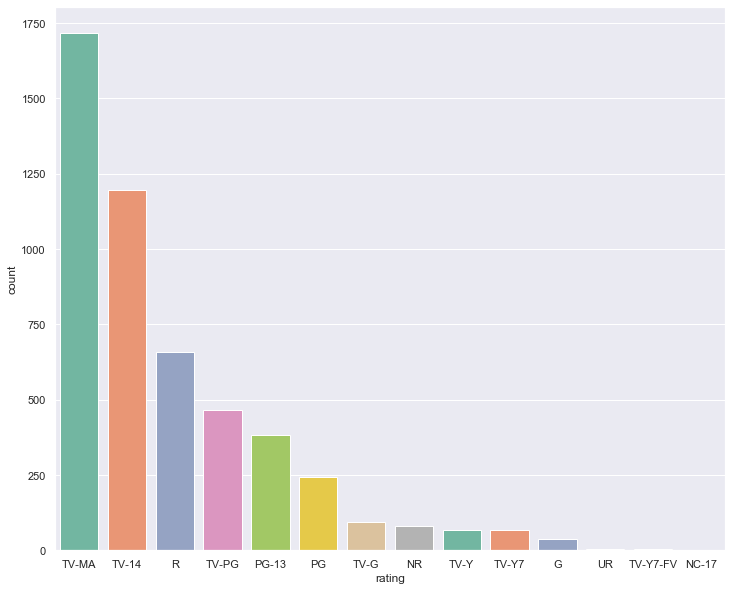

In [22]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_movies, palette="Set2", order=netflix_movies['rating'].value_counts().index[0:15])

Most prevalent rating is TV-MA as shown by the data. 

In [23]:
color_discrete_sequence=px.colors.qualitative.Alphabet

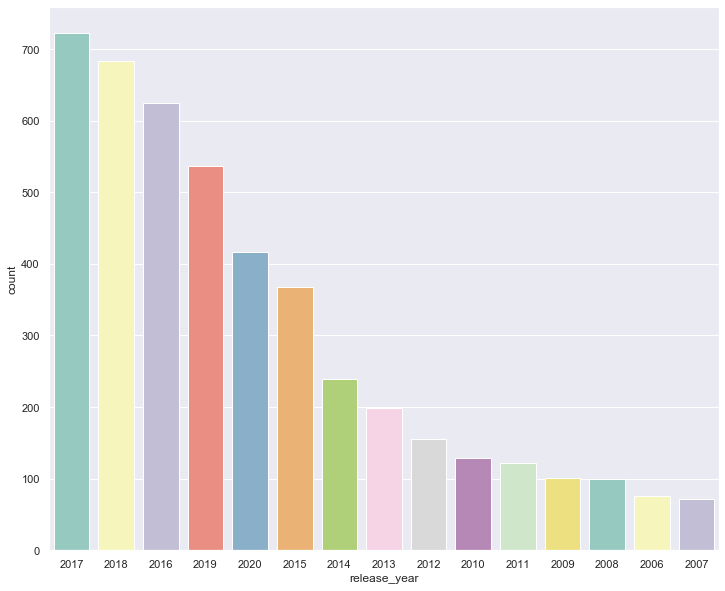

In [24]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="release_year", data=df, palette="Set3", order=df['release_year'].value_counts().index[0:15])

As we can see 2017 was the peek of netflix and it started to trend down. 2020 was a way lower year of netflix releases because of the pandemic and production companies not being able to shoot more movies or TV shows. 

In [25]:
countries={}
df['country']=df['country'].fillna('Unknown')
cou=list(df['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1

In [26]:
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no
        
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}

[Text(0, 0, 'UnitedStates'),
 Text(0, 0, 'France'),
 Text(0, 0, 'UnitedKingdom'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'Belgium'),
 Text(0, 0, 'China'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'India'),
 Text(0, 0, 'Japan')]

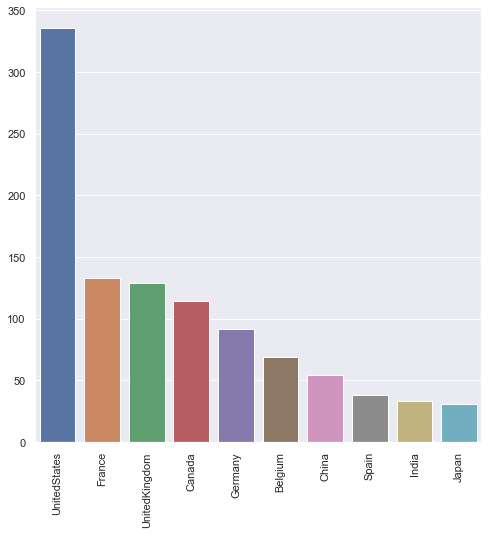

In [27]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 90)

United States is the number one content creating country infront of France and UK.

In [28]:
from sklearn.preprocessing import MultiLabelBinarizer 

In [29]:
def calculate_mlb(series):
    mlb = MultiLabelBinarizer()
    mlb_df = pd.DataFrame(mlb.fit_transform(series), columns=mlb.classes_, index=series.index)
    return mlb_df

In [36]:
def top_genres(df, title='Top ones'):
    genres_df = calculate_mlb(df['genre'])
    tdata = genres_df.sum().sort_values(ascending=False)
    
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=tdata.index,
        y=tdata.values,
    ))
    fig.update_xaxes(categoryorder='total descending')
    fig.update_layout(title=title)
    fig.show()

In [37]:
top_genres(movies, title='Top Movies Genres')

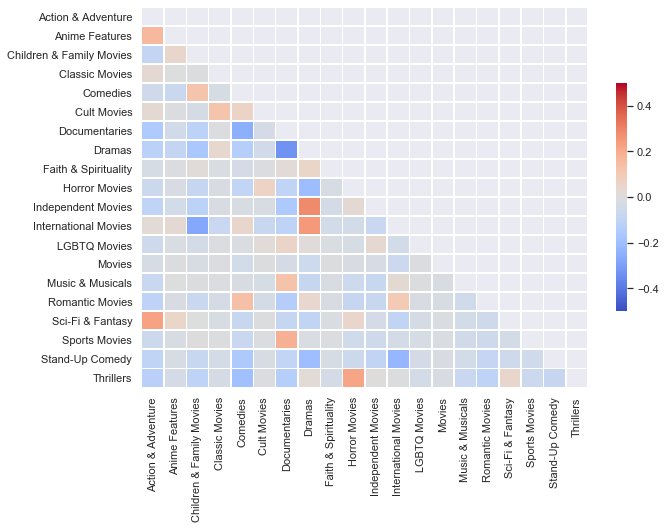

In [38]:
genres_df = calculate_mlb(movies['genre'])

movie_corr = genres_df.corr()
movie_mask = np.zeros_like(movie_corr, dtype=np.bool)
movie_mask[np.triu_indices_from(movie_mask)] = True
fig, ax = plt.subplots(figsize=(10, 7))
pl = sns.heatmap(movie_corr, mask=movie_mask, cmap= "coolwarm", vmax=.5, vmin=-.5, center=0, linewidths=.5,
                 cbar_kws={"shrink": 0.6})
plt.show()



In [39]:
fig = px.pie(df, values='month_added', names='month_added', color_discrete_sequence=px.colors.sequential.RdBu,
             title='Movie Releases by Month')
fig.show()

Over the years, the most popular month to release movies has been december.

In [40]:
df['season_count'] = pd.to_numeric(df['season_count'])

In [41]:
sortby_season =df.sort_values(by=['season_count'], ascending=False)

In [42]:
sortby_season.head(20)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,season_count,genre
5912,s5913,TV Show,Supernatural,Phil Sgriccia,"United States, Canada",2020-06-05,2019,TV-14,,"Classic & Cult TV, TV Action & Adventure, TV H...",2020,6,15.0,"[Classic & Cult TV, TV Action & Adventure, TV ..."
1181,s1182,TV Show,Call the Midwife,Philippa Lowthorpe,United Kingdom,2020-09-15,2020,TV-MA,,"British TV Shows, International TV Shows, TV D...",2020,9,9.0,"[British TV Shows, International TV Shows, TV ..."
4404,s4405,TV Show,Naruto,Hayato Date,Japan,2019-09-01,2006,TV-14,,"Anime Series, International TV Shows",2019,9,9.0,"[Anime Series, International TV Shows]"
6415,s6416,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2020-09-25,2020,TV-14,,"British TV Shows, Reality TV",2020,9,8.0,"[British TV Shows, Reality TV]"
7331,s7332,TV Show,Under Arrest,Dan Forrer,United States,2018-02-01,2016,TV-MA,,"Crime TV Shows, Docuseries, International TV S...",2018,2,8.0,"[Crime TV Shows, Docuseries, International TV ..."
5291,s5292,TV Show,Royal Pains,Jay Chandrasekhar,United States,2017-05-18,2016,TV-PG,,"TV Comedies, TV Dramas",2017,5,8.0,"[TV Comedies, TV Dramas]"
584,s585,TV Show,Arrow,James Bamford,United States,2020-02-05,2019,TV-14,,"Crime TV Shows, TV Action & Adventure",2020,2,8.0,"[Crime TV Shows, TV Action & Adventure]"
2130,s2131,TV Show,Father Brown,Ian Barber,United Kingdom,2018-03-31,2017,TV-14,,"British TV Shows, Crime TV Shows, TV Dramas",2018,3,6.0,"[British TV Shows, Crime TV Shows, TV Dramas]"
6359,s6360,TV Show,The Flash,Glen Winter,United States,2020-05-20,2019,TV-14,,"Crime TV Shows, TV Action & Adventure, TV Sci-...",2020,5,6.0,"[Crime TV Shows, TV Action & Adventure, TV Sci..."
1470,s1471,TV Show,Comedians in Cars Getting Coffee,Jerry Seinfeld,United States,2019-07-19,2019,TV-14,,"Stand-Up Comedy & Talk Shows, TV Comedies",2019,7,6.0,"[Stand-Up Comedy & Talk Shows, TV Comedies]"


Supernatural is the longest tenured show with 15 seasons

In [43]:
fig = px.histogram(x=df['season_count'])
fig.update_xaxes(categoryorder="total descending")
fig.update_layout(
    title="Distribution of shows duration",
    xaxis_title="Duration of the Show",
)
fig.show()

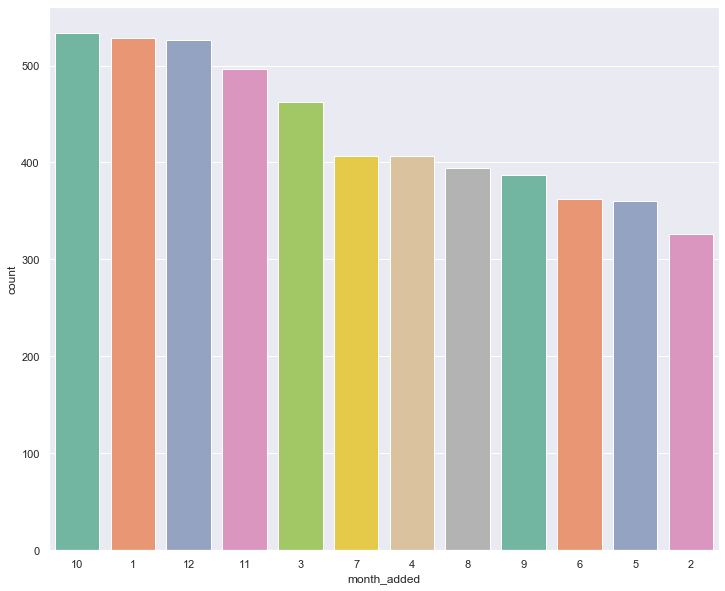

In [44]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="month_added", data=df, palette="Set2", order=df['month_added'].value_counts().index[0:15])

## Anwser Questions

## 1. Are there more movies or TV shows? 
Netflix has more movies than TV shows
## 2. Which country has the most content?
United States is number one with the most content on netflix
## 3. Which rating is most prevalent on Netflix? 
TV-MA is the most prevalent rating on Netflix.
## 4. Which month has the most TV shows/Movie releases? 
October is the month in which most content is added onto netflix. This can be because the weather is getting colder in a lot of states and there are more holidays that come up around the time from October to January so families are staying in more and watching netflix. 
## 5. Which TV show is the longest tenured? 
Supernatural is the longest tenured show on Netflix with 15 seasons. 
## 6. What genres of TV shows and Movies are most popular? 
International movies, dramas and comedies are the top 3 on the list of which genres are most popular. 

## Summary and Conclusion

In conclusion Netflix has been growing steadily since 2007 with its peak year being in 2017. 2020 had its benefits to netflix and some negatives for the company. The benefits being people staying at home more and watching shows or movies on netflix, But I feel as though the reason 2020 was not a better year than 2018 and 2019 was because production for certain Tv shows and movies were put on a hault. This caused netflix to not have the same output of content that they usually have. Obviously Netflix being an American company they have the most output of content. Something that is interesting is that international movies are more famous amoungst people than the plethera of content America pushes out. I feel that would be an interesting analysis to do to follow up off of this analysis.